$$\large \color{green}{\textbf{The Generalized Autoregressive Conditional Ceteroskedasticity (GARCH) Modelling }}$$ 

$$\large \color{blue}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$


This computer program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$\text{2. Dataset:}$ 

One can download the dataset used to replicate my project at my Repositories on the Github site below

https://github.com/phuongvnguyen/GARCH-Modelling/blob/master/data.xlsx

# Preparing Problem

##  Loading Libraries

In [38]:
import warnings
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from arch import arch_model
from arch.univariate import GARCH

## Defining some varibales for printing the result

In [2]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

##  Loading Dataset

In [7]:
data = pd.read_excel("data.xlsx")


# Data Exploration and Preration

## Data exploration

In [8]:
data.head(5)

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2007-09-19,125.0,VIC,125.0,125.0,125.0,307840
1,2007-09-20,131.0,VIC,131.0,131.0,130.0,794790
2,2007-09-21,137.0,VIC,137.0,137.0,135.0,1224660
3,2007-09-24,143.0,VIC,143.0,143.0,143.0,551130
4,2007-09-25,150.0,VIC,150.0,150.0,148.0,962110


## Computing returns
### Picking up the close prices

In [16]:
closePrice = data[['DATE','CLOSE']]
closePrice.head(5)

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


### Computing the daily returns

In [17]:
closePrice['Return'] = closePrice['CLOSE'].pct_change()
closePrice.head()

,DATE,CLOSE,Return
0,2007-09-19,125.0,NaN
1,2007-09-20,131.0,0.048000
2,2007-09-21,137.0,0.045802
3,2007-09-24,143.0,0.043796
4,2007-09-25,150.0,0.048951


In [18]:
daily_return=closePrice[['DATE','Return']]
daily_return.head()

,DATE,Return
0,2007-09-19,NaN
1,2007-09-20,0.048000
2,2007-09-21,0.045802
3,2007-09-24,0.043796
4,2007-09-25,0.048951


### Reseting index

In [19]:
daily_return =daily_return.set_index('DATE')
daily_return.head()

,Return
DATE,
2007-09-19,NaN
2007-09-20,0.048000
2007-09-21,0.045802
2007-09-24,0.043796
2007-09-25,0.048951


In [25]:
daily_return = 100 * daily_return.dropna()
daily_return.head()

,Return
DATE,
2007-09-20,4.800000
2007-09-21,4.580153
2007-09-24,4.379562
2007-09-25,4.895105
2007-09-26,4.666667


In [26]:
daily_return.index

DatetimeIndex(['2007-09-20', '2007-09-21', '2007-09-24', '2007-09-25',
               '2007-09-26', '2007-09-27', '2007-09-28', '2007-10-01',
               '2007-10-02', '2007-10-03',
               ...
               '2013-12-18', '2013-12-19', '2013-12-20', '2013-12-23',
               '2013-12-24', '2013-12-25', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1569, freq=None)

### Plotting returns

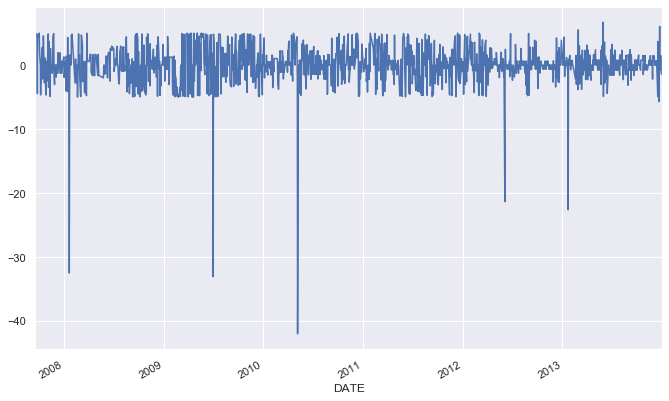

In [33]:
fig=plt.figure(figsize=(10,7))
figure = daily_return['Return'].plot()

Text(0.5, 0, 'Source: The Daily Close Price-based Calculations')

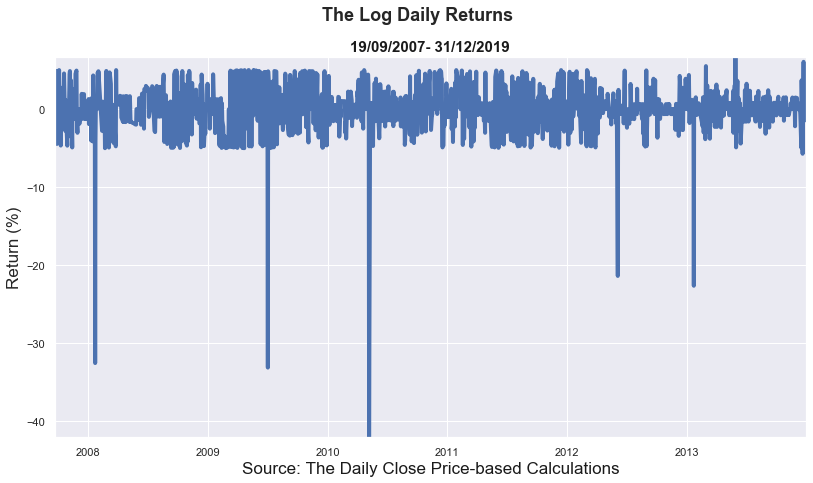

In [30]:
sns.set()
fig=plt.figure(figsize=(12,7))
plt.plot(daily_return.Return['2007':'2013'],LineWidth=4)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Log Daily Returns', fontsize=18,fontweight='bold')
plt.title('19/09/2007- 31/12/2019',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Return (%)',fontsize=17)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=17,fontweight='normal',color='k')

# Modelling GARCH model

$$\text{Mean equation:}$$
$$r_{t}=\mu + \epsilon_{t}$$

$$\text{Volatility equation:}$$
$$\sigma^{2}_{t}= \omega + \alpha \epsilon^{2}_{t} + \beta\sigma^{2}_{t-1}$$

$$\text{Volatility equation:}$$

$$\epsilon_{t}= \sigma_{t} e_{t}$$

$$e_{t} \sim N(0,1)$$


In [43]:
am = arch_model(daily_return,p=1, o=0, q=1)
res = am.fit(update_freq=1)
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3885.3467982247066
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3877.0312321042275
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3861.087448190494
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3854.509431912371
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3851.1131556060673
Iteration:      6,   Func. Count:     44,   Neg. LLF: 3847.280064200558
Iteration:      7,   Func. Count:     51,   Neg. LLF: 3846.9249627311465
Iteration:      8,   Func. Count:     57,   Neg. LLF: 3844.379300270364
Iteration:      9,   Func. Count:     63,   Neg. LLF: 3843.992837376597
Iteration:     10,   Func. Count:     69,   Neg. LLF: 3843.973895501096
Iteration:     11,   Func. Count:     75,   Neg. LLF: 3843.973090964775
Iteration:     12,   Func. Count:     81,   Neg. LLF: 3843.973082360283
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3843.973082719966
            Iterations:

# Checking the residual

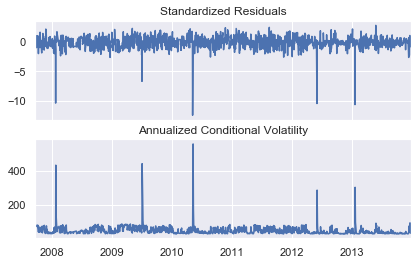

In [37]:

fig = res.plot(annualize='D')